# Phase 3: Merging Datasets and Building a Model

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
import statsmodels.api as sm

The code below loads and cleans the original NYPD Felonies dataset. The code specifically selects the following features (fields within the dataset outlined in red below). The selected fields do not contain null values.

In [45]:
def cleaning_data(data):
    # useful features
    features = ['objectid','occurrence_date','day_of_week','occurrence_month','occurrence_day','occurrence_year','occurrence_hour'
               , 'compstat_month','compstat_day','compstat_year','offense','offense_classification','sector','precinct','jurisdiction'
               , 'xcoordinate','ycoordinate']
    # select useful featuers from original data
    clean_data = data[features]
    return clean_data
    
data = pd.read_csv('./NYPD_Dataset.csv')
data = cleaning_data(data)

## Merging the NY Population Dataset with the NYPD Felonies Dataset

The code below loads the population data, filters the Borough field for Manhattan, and outputs the first five rows of the dataset.

In [46]:
pop_data = pd.read_csv('./New_York_City_Population_By_Community_Districts.csv')
man_mask = pop_data['Borough'] == 'Manhattan'
pop_data = pop_data[man_mask]
pop_data.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
30,Manhattan,1,"Battery Park City, Tribeca",7706,15918,25366,34420,60978
31,Manhattan,2,"Greenwich Village, Soho",84337,87069,94105,93119,90016
32,Manhattan,3,"Lower East Side, Chinatown",181845,154848,161617,164407,163277
33,Manhattan,4,"Chelsea, Clinton",83601,82164,84431,87479,103245
34,Manhattan,5,Midtown Business District,31076,39544,43507,44028,51673


After filtering on the Borough field for Manhattan, the 2010 Population field will be merged to the original NYPD Felonies dataset. The limitation here is that my original dataset is not organized at the community-district level and therefore the merging excercise at the community-district level is elevated to the borough level. Therefore, a new field is added to the original dataset that contains the entire Manhattan population. The code below prints the population of Manhattan in 2010.

In [47]:
print("Manhattan 2010 population: " + str(sum(pop_data['2010 Population'])))


Manhattan 2010 population: 1577385


The code below merges the new field, Manhattan_Population, to the original NYPD Felonies dataset and provides a snapshot of the output.

In [48]:
total_pop = sum(pop_data['2010 Population'])
total_pop_col = [total_pop] * len(data)

In [49]:
data['Manhattan_Population'] = total_pop_col

In [50]:
data

,objectid,occurrence_date,day_of_week,occurrence_month,occurrence_day,occurrence_year,occurrence_hour,compstat_month,compstat_day,compstat_year,offense,offense_classification,sector,precinct,jurisdiction,xcoordinate,ycoordinate,Manhattan_Population
0,793151,2012-07-09T12:00:00+00:00,Monday,Jul,9.0,2012.0,12.0,8,10,2012,GRAND LARCENY,FELONY,G,1.0,N.Y. POLICE DEPT,982559,199560,1577385
1,795819,2011-10-28T11:00:00+00:00,Friday,Oct,28.0,2011.0,11.0,10,29,2011,GRAND LARCENY,FELONY,D,9.0,N.Y. POLICE DEPT,986667,205561,1577385
2,796506,2012-10-16T09:00:00+00:00,Tuesday,Oct,16.0,2012.0,9.0,10,17,2012,GRAND LARCENY,FELONY,C,24.0,N.Y. POLICE DEPT,992664,229381,1577385
3,794302,2012-11-24T03:30:00+00:00,Saturday,Nov,24.0,2012.0,3.0,11,24,2012,FELONY ASSAULT,FELONY,A,6.0,N.Y. POLICE DEPT,984440,204596,1577385
4,793156,2012-07-09T12:00:00+00:00,Monday,Jul,9.0,2012.0,12.0,8,14,2012,GRAND LARCENY,FELONY,C,23.0,N.Y. HOUSING POLICE,997541,226681,1577385
5,794312,2011-10-28T01:30:00+00:00,Friday,Oct,28.0,2011.0,1.0,11,8,2011,GRAND LARCENY,FELONY,G,1.0,N.Y. POLICE DEPT,981515,201136,1577385
6,794314,2011-10-28T01:30:00+00:00,Friday,Oct,28.0,2011.0,1.0,10,29,2011,ROBBERY,FELONY,C,30.0,N.Y. TRANSIT POLICE,999539,239499,1577385
7,796518,2012-10-16T09:50:00+00:00,Tuesday,Oct,16.0,2012.0,9.0,10,16,2012,BURGLARY,FELONY,A,34.0,N.Y. POLICE DEPT,1003908,251675,1577385
8,795841,2013-05-11T12:00:00+00:00,Saturday,May,11.0,2013.0,12.0,5,24,2013,GRAND LARCENY,FELONY,H,19.0,N.Y. POLICE DEPT,996633,220135,1577385
9,795844,2013-05-11T12:30:00+00:00,Saturday,May,11.0,2013.0,12.0,5,11,2013,GRAND LARCENY,FELONY,G,19.0,N.Y. POLICE DEPT,994709,218899,1577385


## Building a Model

The following code counts the number of felonies per precinct for grand larceny and felony assault offense types. The code below applied no additional filtering criteria for time and covers the years 2006 through 2016.

In [51]:

pre_list = pd.unique(data['precinct'])
offense_type_list = ['GRAND LARCENY','FELONY ASSAULT']
felony_count_dic = {}

for off in offense_type_list:
    off_mask = data['offense'] == off
    off_data = data[off_mask]
    if len(off_data) > 0 :
        felony_count_dic.setdefault(off,{})
        for p in pre_list:
            p_mask = off_data['precinct'] == p
            p_data = off_data[p_mask]
            if len(p_data) > 0 :
                felony_count_dic[off].setdefault(p,len(p_data))
                

In [52]:
fel_df = pd.DataFrame(felony_count_dic)
fel_df = fel_df.rename(index=str, columns={"GRAND LARCENY": "GRAND_LARCENY", "FELONY ASSAULT": "FELONY_ASSAULT"})

The code below forms the model and presents the ordinary least squares regression outputs.

In [53]:
precinct_model = smf.ols('GRAND_LARCENY ~ FELONY_ASSAULT', data=fel_df).fit()
precinct_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          GRAND_LARCENY   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.4414
Date:                Wed, 08 May 2019   Prob (F-statistic):              0.514
Time:                        20:12:20   Log-Likelihood:                -222.34
No. Observations:                  22   AIC:                             448.7
Df Residuals:                      20   BIC:                             450.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9473.9241   3125.333      3.031      0.007    2954.594     1.6e+04
FELONY_ASSAULT    -1.2530      1.886     -0.664      0.514      -5.187       2.681
==============================================================================
Omnibus:                        9.944   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.634
Skew:                           1.305   Prob(JB):                       0.0220
Kurtosis:                       4.233   Cond. No.                     3.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The code below plots the relevant data points and forms a regression line.

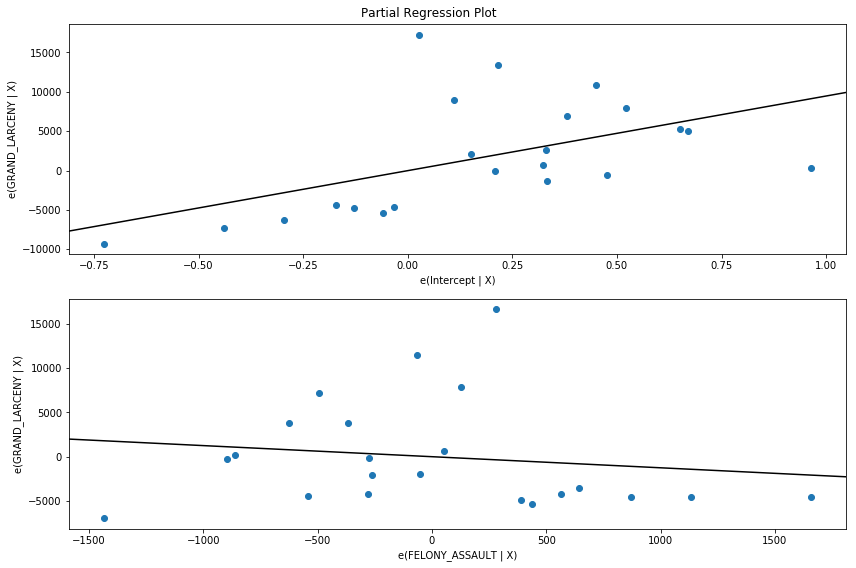

In [54]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(precinct_model, fig=fig)

The above regression model (second chart directly above this markdown) regresses the occurrences of felony assault crimes against the occurrences of grand larceny crimes at the precinct level over the period 2006 through 2016. The number of unique precincts included in the above regression was 22. While the model was successfully run, the output of the regression analysis did not yield statistically significant findings. For example, the coefficient of determination (R2) was 0.022, which implies a low statistical fit between the felonies under comparison. In other words, the occurrances of felony assault cannot be caused or explained by its relationship to grand larceny crimes.